In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

rng = numpy.random


# Training Data
train_X = numpy.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                         7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
train_Y = numpy.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                         2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder('float')
Y = tf.placeholder('float')

# Set model weights
W = tf.Variable(rng.randn(), name='weight')
b = tf.Variable(rng.randn(), name='bias')

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2)) / (2*n_samples)
# Gradient descent
# Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Epoch: 0050 cost= 0.543945372 W= 0.63144296 b= -1.9455305
Epoch: 0100 cost= 0.490021378 W= 0.60873264 b= -1.7821542
Epoch: 0150 cost= 0.442322165 W= 0.58737266 b= -1.6284926
Epoch: 0200 cost= 0.400130242 W= 0.56728333 b= -1.4839712
Epoch: 0250 cost= 0.362810016 W= 0.5483891 b= -1.3480475
Epoch: 0300 cost= 0.329797566 W= 0.53061813 b= -1.2202041
Epoch: 0350 cost= 0.300597608 W= 0.5139046 b= -1.0999676
Epoch: 0400 cost= 0.274768502 W= 0.49818474 b= -0.9868801
Epoch: 0450 cost= 0.251921892 W= 0.48339972 b= -0.88051885
Epoch: 0500 cost= 0.231713101 W= 0.46949416 b= -0.78048307
Epoch: 0550 cost= 0.213838220 W= 0.45641592 b= -0.6863987
Epoch: 0600 cost= 0.198026910 W= 0.44411504 b= -0.59790725
Epoch: 0650 cost= 0.184041634 W= 0.4325459 b= -0.51467985
Epoch: 0700 cost= 0.171671286 W= 0.4216649 b= -0.43640196
Epoch: 0750 cost= 0.160729617 W= 0.41143104 b= -0.36278012
Epoch: 0800 cost= 0.151051611 W= 0.40180573 b= -0.29353657
Epoch: 0850 cost= 0.142491356 W= 0.39275295 b= -0.22841159
Epoch: 090

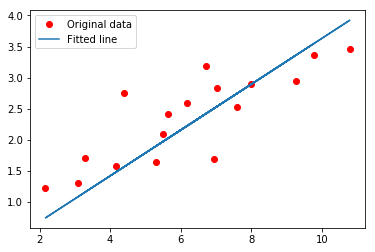

In [3]:
sess = tf.Session()
# Run the initializer
sess.run(init)

# Fit all training data
training_epochs = 1000
display_step = 50
for epoch in range(training_epochs):
    for (x, y) in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict={X: x, Y: y})

    # Display logs per epoch step
    if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
        print('Epoch:', '%04d' % (epoch+1), 'cost=', '{:.9f}'.format(c),
              'W=', sess.run(W), 'b=', sess.run(b))
# end for

print('Optimization Finished')
training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
print('Training cost=', training_cost, 'W=', sess.run(W), 'b=', sess.run(b), '\n')

# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

Testing... (Mean square loss Comparison)
Testing cost= 0.105945975
Absolute mean square loss difference: 0.016353555


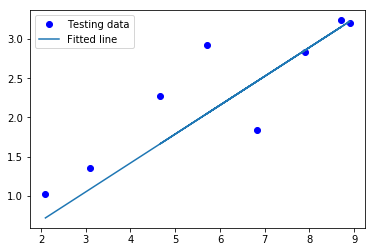

In [4]:
# Testing example, as requested (Issue #2)
test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

print('Testing... (Mean square loss Comparison)')
# same function as cost above
cost = tf.reduce_sum(tf.pow(pred-Y, 2)) / (2*test_X.shape[0])
testing_cost = sess.run(cost, feed_dict={X: test_X, Y: test_Y})
print('Testing cost=', testing_cost)
print('Absolute mean square loss difference:', abs(training_cost - testing_cost))

plt.plot(test_X, test_Y, 'bo', label='Testing data')
plt.plot(test_X, sess.run(W) * test_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()
